Третья лабораторная работа

In [1]:
import thinkdsp as td
import numpy as np
PI2 = np.pi * 2

In [7]:
class SawtoothChirp(td.Chirp):
    def evaluate(self, ts):
        ts = np.asarray(ts)
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  td.normalize(td.unbias(frac), self.amp)
        return ys

In [59]:
signal = SawtoothChirp(start=220, end=1760, amp=0.5)
wave1 = signal.make_wave(duration=5, framerate=5000)
wave1.make_audio()

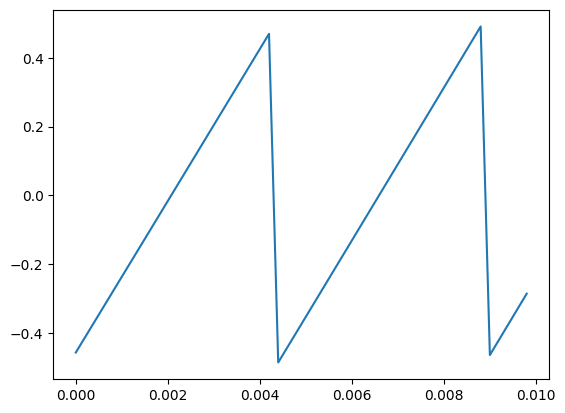

In [60]:
wave1.segment(start=0, duration=0.01).plot()

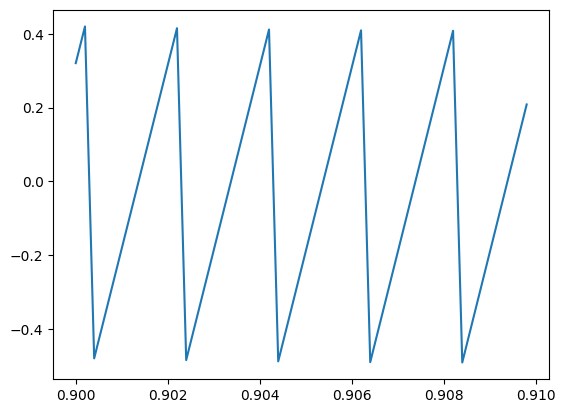

In [61]:
wave1.segment(start=0.9, duration=0.01).plot()

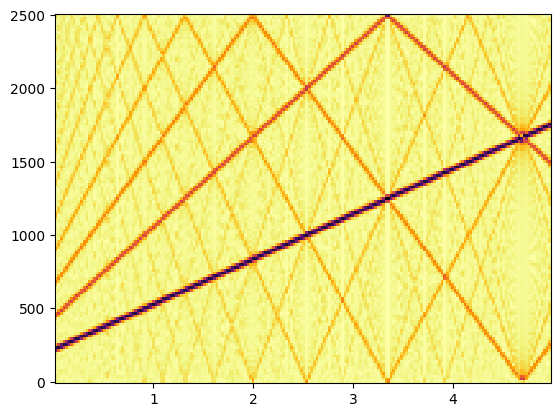

In [65]:
wave1_spectrogram = wave1.make_spectrogram(256)
wave1_spectrogram.plot()

Биения отчетливо видны на картинке в виде менее интенсивных лучей, которые отражаются от частоты равной половине от framerate. Биения уходят при увеличении частоты взятия кадров

In [68]:
signal = SawtoothChirp(start=2500, end=3000, amp=1.0)
wave2 = signal.make_wave(duration=1, framerate=20000)
wave2.make_audio()

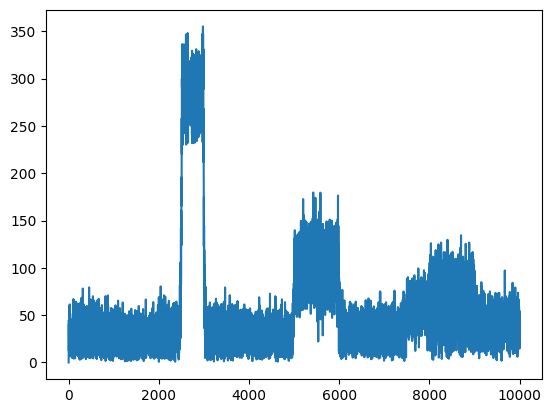

In [69]:
wave2_spectrum = wave2.make_spectrum()
wave2_spectrum.plot()

TODO()

In [80]:
glissando_wave = td.read_wave("rhapblue11924_64kb.wav").segment(6, 4)
glissando_wave.make_audio()

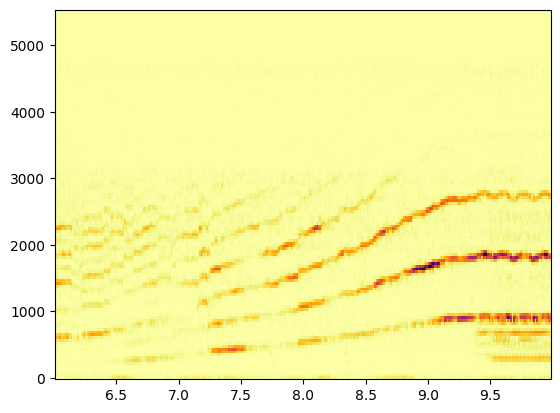

In [81]:
glissando_wave.make_spectrogram(256).plot()

In [84]:
class TromboneGliss(td.Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts) - 1)
        freqs = 1 / lengths
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys